In [59]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics

In [60]:
df = pd.read_csv('deliveries.csv')

In [61]:
df.shape

(17380, 22)

In [62]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [64]:
df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

EDA

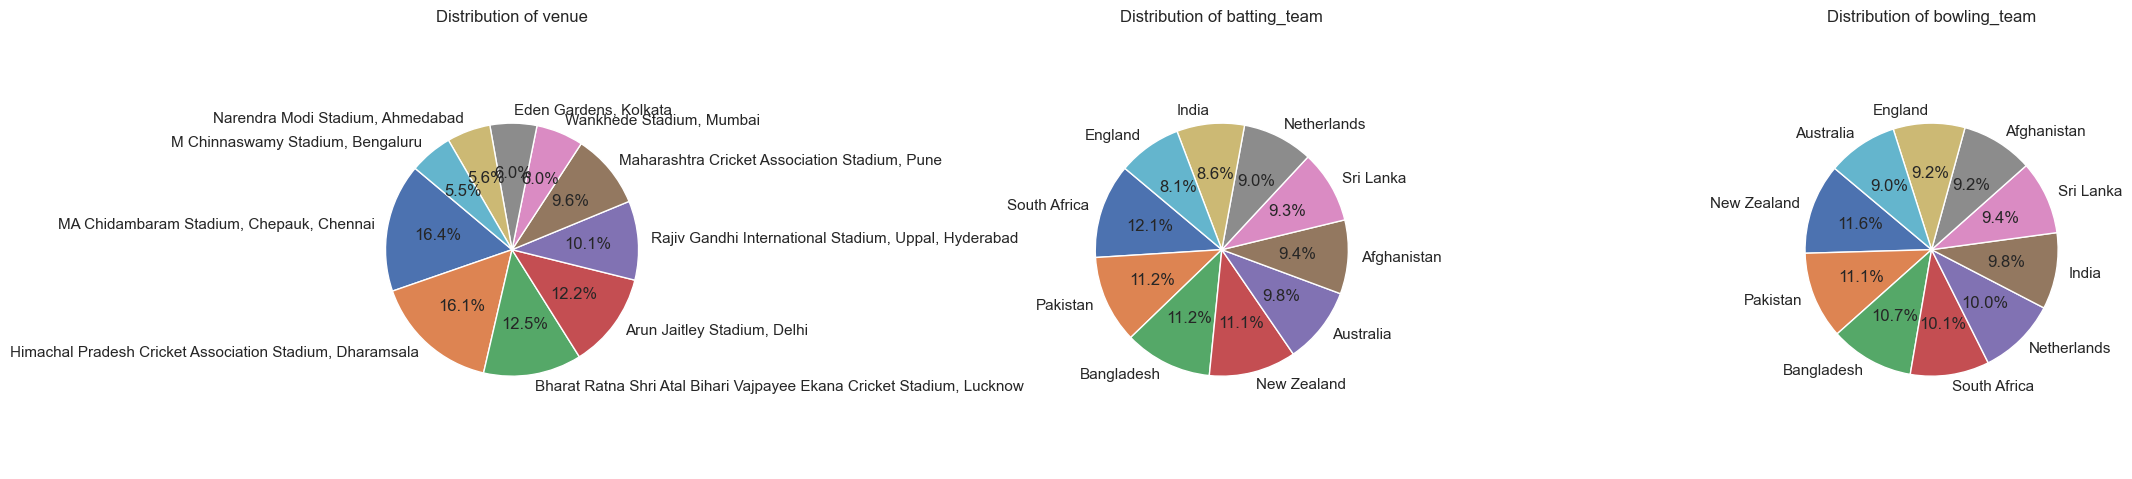

In [65]:
import matplotlib.pyplot as plt

# Categorical columns
categorical_columns = ['venue', 'batting_team', 'bowling_team']

# Determine the number of subplots based on the number of categorical columns
num_subplots = len(categorical_columns)

# Create subplots for the categorical columns
fig, axes = plt.subplots(1, num_subplots, figsize=(7 * num_subplots, 5))

# Create pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

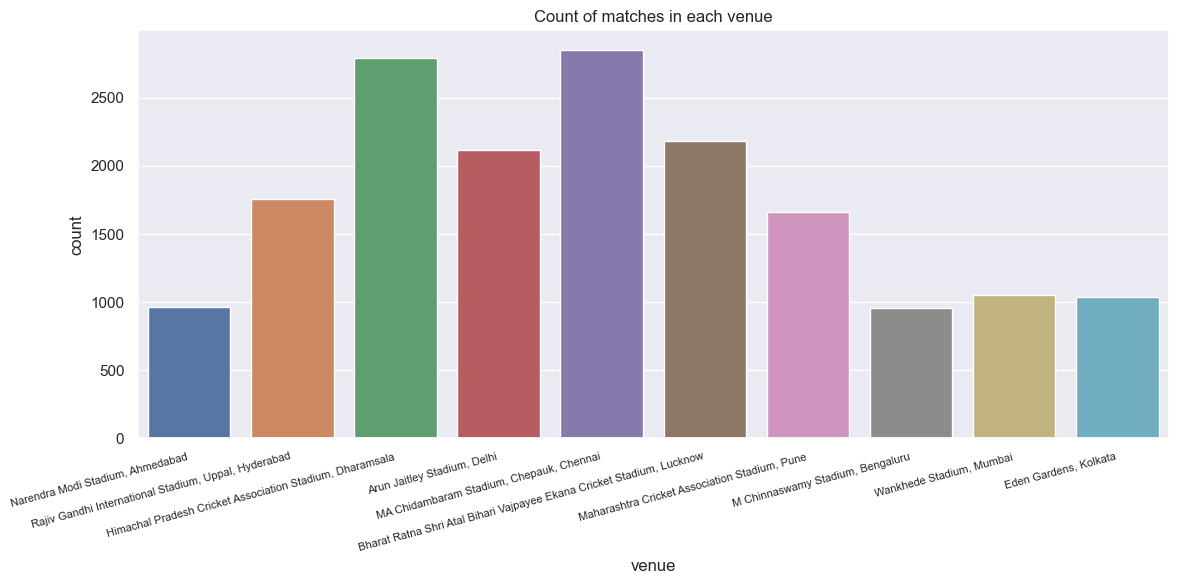

In [66]:
# Count plot for 'venue_x'
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=df)
plt.title('Count of matches in each venue')
plt.xticks(rotation=15, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

The plot shows the total number of matches held at different stadiums.

In [67]:
selected_features = ['match_id', 'venue', 'innings', 'batting_team', 'bowling_team', 
                     'ball', 'runs_off_bat', 'wides', 'noballs', 'byes', 'legbyes', 'extras']

In [68]:
sel_df = df[selected_features]

In [69]:
sel_df[["extras", "wides", "noballs"]] = sel_df[["extras", "wides", "noballs"]].fillna(0)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_28900\3971135270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df[["extras", "wides", "noballs"]] = sel_df[["extras", "wides", "noballs"]].fillna(0)


In [70]:
sel_df["runs_on_ball"] = sel_df["runs_off_bat"] + sel_df["extras"]

C:\Users\Vedant\AppData\Local\Temp\ipykernel_28900\1617141090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["runs_on_ball"] = sel_df["runs_off_bat"] + sel_df["extras"]


In [71]:
runs_per_inning = sel_df.groupby(['match_id', 'innings'])['runs_on_ball'].sum().reset_index(name="runs_per_inning")
sel_df = sel_df.merge(runs_per_inning, on=['match_id', 'innings'], how='left')

In [72]:
total_balls = sel_df.groupby(['match_id', 'innings'])['ball'].size().reset_index(name ='total_balls')
wide_balls = sel_df.groupby(['match_id', 'innings'])['wides'].apply(lambda x: (x != 0).sum()).reset_index(name="total_wides")
no_balls = sel_df.groupby(['match_id', 'innings'])['noballs'].apply(lambda x: (x != 0).sum()).reset_index(name='total_noballs')

In [73]:
sel_df = sel_df.merge(total_balls, on=['match_id', 'innings'], how='left')
sel_df = sel_df.merge(wide_balls, on=['match_id', 'innings'], how='left')
sel_df = sel_df.merge(no_balls, on=['match_id', 'innings'], how='left')

In [74]:
sel_df["Overs_Played"] = (sel_df["total_balls"] - sel_df["total_wides"] - sel_df["total_noballs"])/6

In [75]:
sel_df.head()

,match_id,venue,innings,batting_team,bowling_team,ball,runs_off_bat,wides,noballs,byes,legbyes,extras,runs_on_ball,runs_per_inning,total_balls,total_wides,total_noballs,Overs_Played
0,1,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,0.1,0,0.0,0.0,NaN,NaN,0,0,282,304,4,0,50.0
1,1,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,0.2,6,0.0,0.0,NaN,NaN,0,6,282,304,4,0,50.0
2,1,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,0.3,1,0.0,0.0,NaN,NaN,0,1,282,304,4,0,50.0
3,1,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,0.4,1,0.0,0.0,NaN,NaN,0,1,282,304,4,0,50.0
4,1,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,0.5,4,0.0,0.0,NaN,NaN,0,4,282,304,4,0,50.0


In [76]:
drop_cols=['match_id','ball','runs_off_bat','wides','noballs','byes','legbyes','extras','runs_on_ball','total_balls','total_wides','total_noballs']

sel_df = sel_df.drop(drop_cols,axis='columns')
sel_df.shape

(17380, 6)

In [77]:
sel_df.head()

,venue,innings,batting_team,bowling_team,runs_per_inning,Overs_Played
0,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.0
1,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.0
2,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.0
3,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.0
4,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.0


C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


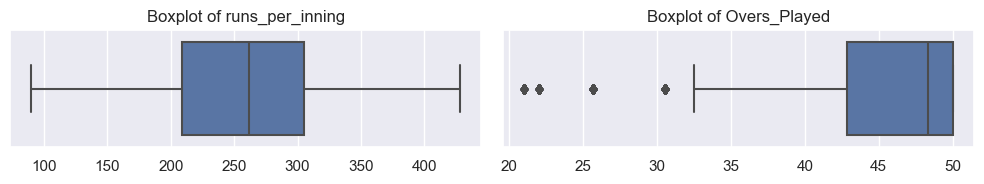

In [78]:

fig, axes = plt.subplots(1, 2, figsize=(10, 2))

axes = axes.flatten()

columns = ['runs_per_inning','Overs_Played']

for ax, col in zip(axes, columns):
    sns.boxplot(x=sel_df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

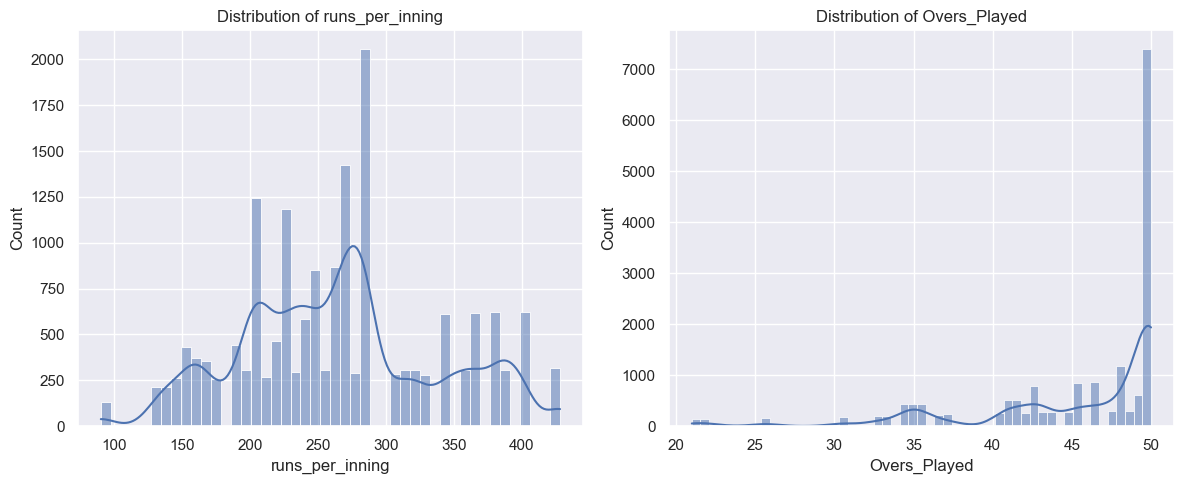

In [79]:
plt.figure(figsize=(12, 5))

# Histogram for 'total_runs_per_inning_match'
plt.subplot(1, 2, 1)
sns.histplot(sel_df['runs_per_inning'], kde=True)
plt.title('Distribution of runs_per_inning')

# Histogram for 'Total_Overs_Played'
plt.subplot(1, 2, 2)
sns.histplot(sel_df['Overs_Played'], kde=True)
plt.title('Distribution of Overs_Played')

plt.tight_layout()
plt.show()

These graphs show the distribution of runs scored per inning and the number of overs bowled per innings. 

In [80]:
sel_df = sel_df.drop_duplicates(keep='first')

In [81]:
sel_df.shape

(64, 6)

In [82]:
sel_df.head()

,venue,innings,batting_team,bowling_team,runs_per_inning,Overs_Played
0,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.000000
304,"Narendra Modi Stadium, Ahmedabad",2,New Zealand,England,283,36.333333
525,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,Pakistan,Netherlands,286,48.833333
827,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,Netherlands,Pakistan,205,41.000000
1082,"Himachal Pradesh Cricket Association Stadium, ...",1,Afghanistan,Bangladesh,156,37.333333


C:\Users\Vedant\AppData\Local\Temp\ipykernel_28900\1212791032.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='batting_team', y='runs_per_inning', data=sel_df, ci=None)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFound

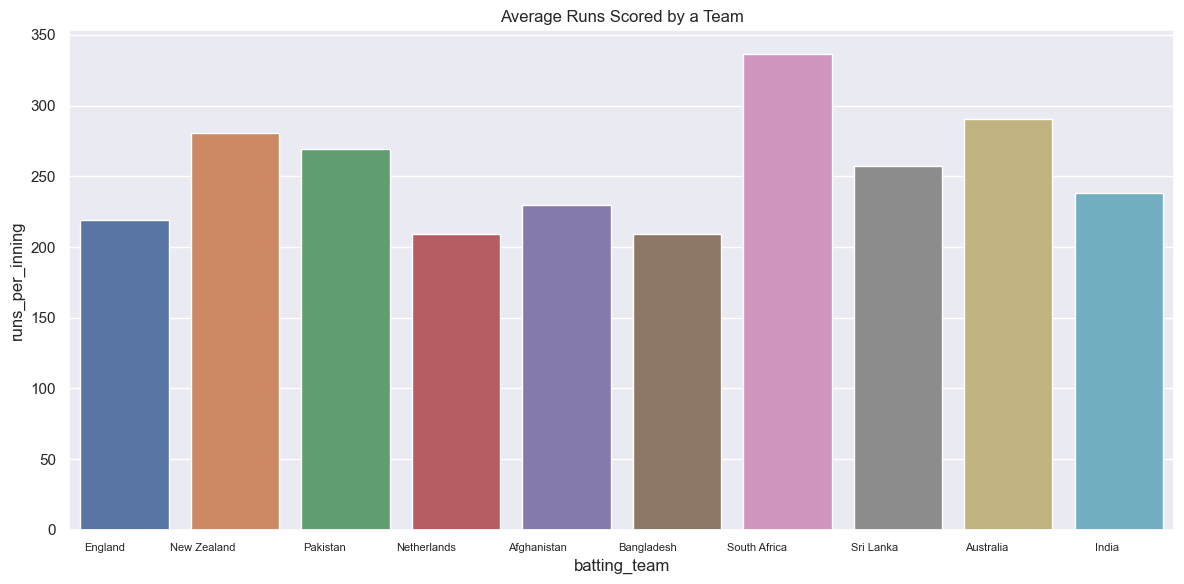

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='runs_per_inning', data=sel_df, ci=None)
plt.title('Average Runs Scored by a Team')
plt.xticks(ha='right', fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\Vedant\AppData\Local\Temp\ipykernel_28900\1877789078.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='venue', y='runs_per_inning', data=sel_df, ci=None)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.P

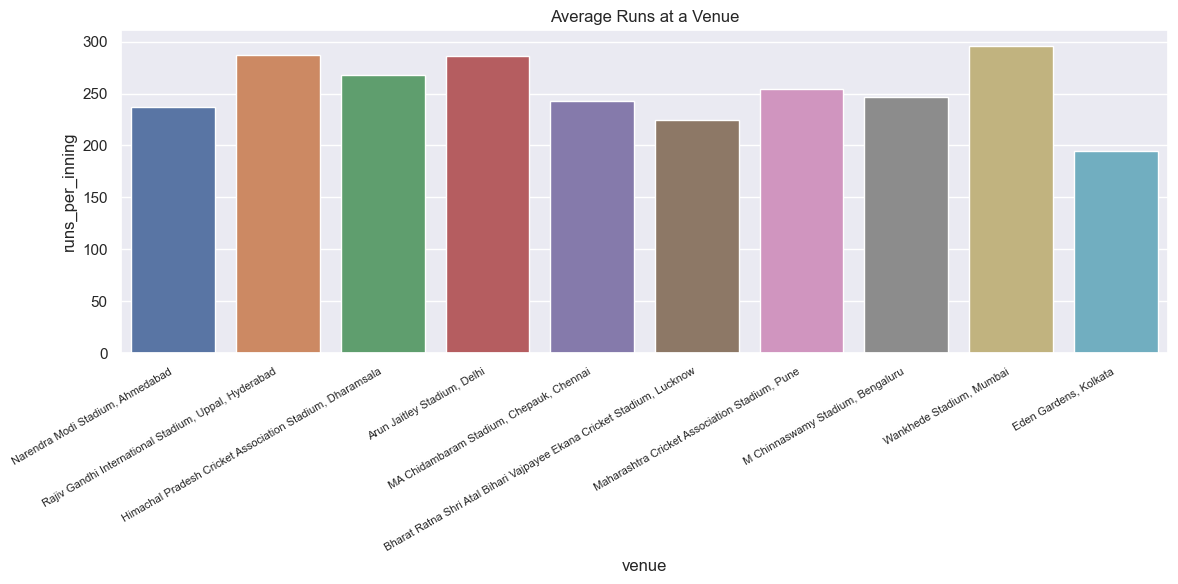

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x='venue', y='runs_per_inning', data=sel_df, ci=None)
plt.title('Average Runs at a Venue')
plt.xticks(rotation=30,ha = 'right',fontsize=8)
plt.tight_layout()
plt.show()

In [85]:
sel_df = sel_df.drop(['venue'], axis=1)

In [86]:
sel_df = sel_df.reset_index(drop=True)

In [87]:
sel_df.head(64)

,innings,batting_team,bowling_team,runs_per_inning,Overs_Played
0,1,England,New Zealand,282,50.000000
1,2,New Zealand,England,283,36.333333
2,1,Pakistan,Netherlands,286,48.833333
3,2,Netherlands,Pakistan,205,41.000000
4,1,Afghanistan,Bangladesh,156,37.333333
...,...,...,...,...,...
59,2,Afghanistan,Sri Lanka,242,45.333333
60,1,Bangladesh,Pakistan,204,45.166667
61,2,Pakistan,Bangladesh,205,32.500000
62,1,South Africa,New Zealand,357,50.000000


Analysis of First Inning's Scores

In [88]:
df_1 = sel_df[sel_df['innings'] == 1]

In [89]:
df_1 = df_1.reset_index(drop = True)

In [90]:
df_1.head(32)

,innings,batting_team,bowling_team,runs_per_inning,Overs_Played
0,1,England,New Zealand,282,50.000000
1,1,Pakistan,Netherlands,286,48.833333
2,1,Afghanistan,Bangladesh,156,37.333333
3,1,South Africa,Sri Lanka,428,50.000000
4,1,Australia,India,199,49.500000
5,1,New Zealand,Netherlands,322,50.000000
6,1,England,Bangladesh,364,50.000000
7,1,Sri Lanka,Pakistan,344,50.000000
8,1,Afghanistan,India,272,50.000000
9,1,Bangladesh,New Zealand,245,50.000000


In [91]:
df_1.shape

(32, 5)

In [92]:
df_1.describe()

,innings,runs_per_inning,Overs_Played
count,32.0,32.000000,32.000000
mean,1.0,285.000000,48.078125
std,0.0,73.028938,4.014308
min,1.0,156.000000,33.333333
25%,1.0,238.000000,49.208333
50%,1.0,277.500000,50.000000
75%,1.0,347.250000,50.000000
max,1.0,428.000000,50.000000


In [93]:
df_1.columns

Index(['innings', 'batting_team', 'bowling_team', 'runs_per_inning',
       'Overs_Played'],
      dtype='object')

In [94]:
df_1.isnull().sum()

innings            0
batting_team       0
bowling_team       0
runs_per_inning    0
Overs_Played       0
dtype: int64

Label Encoding

In [95]:
le = preprocessing.LabelEncoder()

In [96]:
df_1['batting_team'] = le.fit_transform(df_1['batting_team'])

In [97]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Afghanistan': 0, 'Australia': 1, 'Bangladesh': 2, 'England': 3, 'India': 4, 'Netherlands': 5, 'New Zealand': 6, 'Pakistan': 7, 'South Africa': 8, 'Sri Lanka': 9}


In [98]:
df_1['bowling_team'] = le.fit_transform(df_1['bowling_team'])

In [99]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Afghanistan': 0, 'Australia': 1, 'Bangladesh': 2, 'England': 3, 'India': 4, 'Netherlands': 5, 'New Zealand': 6, 'Pakistan': 7, 'South Africa': 8, 'Sri Lanka': 9}


Model Training

In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

In [101]:
X = df_1[['innings', 'batting_team', 'bowling_team', 'Overs_Played']]
y = df_1['runs_per_inning']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, shuffle=True)

In [103]:
standard_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [104]:
X_test.head()

,innings,batting_team,bowling_team,Overs_Played
29,1,9,0,49.500000
15,1,2,4,50.000000
24,1,3,9,33.333333
17,1,5,9,49.666667
8,1,0,4,50.000000


In [105]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(50, 150, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [2,3]}}}
}

In [112]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], verbose=0)
        classifier.fit(X_train_scaled, y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
        train_mae = mean_absolute_error(y_train, y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
        test_mae = mean_absolute_error(y_test, y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model)
    y_predicted = best_reg_model.predict(X_test_scaled)

    return model_results,best_reg_model

In [113]:
model_results,best_reg_model = eval_models()
model_results

LinearRegression 51.304556399584975 {}
RandomForestRegressor 21.36251719877386 {'max_depth': 7, 'n_estimators': 105}


C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFound

XGBRegressor 45.03474037650066 {'learning_rate': 0.001, 'n_estimators': 710}
Best model:  LinearRegression()


,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,51.304556,64.64872,41.720729,60.155625,{}
RandomForestRegressor,21.362517,78.273641,16.525077,71.47619,"{'max_depth': 7, 'n_estimators': 105}"
XGBRegressor,45.03474,68.924292,37.163577,59.53646,"{'learning_rate': 0.001, 'n_estimators': 710}"


In [114]:
print(best_reg_model)

LinearRegression()


In [115]:
y_predicted = best_reg_model.predict(X_test_scaled)

In [116]:
print(y_predicted)

[285.9215942  313.46487355 127.19828446 359.82669259 309.15357536
 331.2866354  272.63428991]


Pickle File

In [111]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("score_1.pkl","wb")
pickle.dump(LinearRegression, pickle_out)
#Serialization
pickle_out.close()